<img
src="http://www.telecom-em.eu/sites/default/files/logoimt2016.JPG"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Kernel methods </font></p>
<p><font size="4">  By Kevin Michalewicz </font></p>
</p>
</CENTER>

----------------------------

## I - Kernel density estimation

> 1. Implement the kernel density estimator with a Gaussian kernel in a function **kde(x,data=data,h=0)** where $x$ represents the locations where the density estimator is computed, $data$ the data and $h$ the bandwidth. For default value $h=0$ the bandwidth should be changed inside the function to the standard Sylverman bandwidth estimator. 
> 2. For $n=100$ samples of a $\mathcal{N}(1,1)$ distribution, plot the pdf and its estimator. 
> 3. Check the influence of the value of the bandwidth parameter.
<!--Use bandwidth parameter suggested in (https://en.wikipedia.org/wiki/Kernel_density_estimation).--> 

In [46]:
from pylab import *
%matplotlib inline
import numpy as np

In [47]:
# Data generation
n = 100 # samples
data = np.random.randn(n) + 1 # because both the mean and variance are 1

In [55]:
def K(x, h):
    return (1/(sqrt(2*pi)*h))*exp(-(x/h)**2/2) # Gaussian kernel

def kde(x, data=data, h=0):
    if h <= 0:
        h = 1.06*std(data)*n**(-1/5) # Silverman bandwidth estimator
    return [mean(array([K(y-u,h) for u in data])) for y in x]

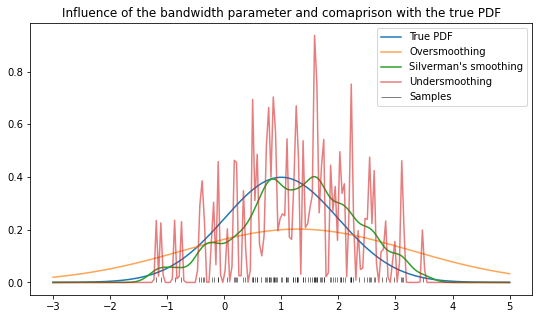

In [56]:
t = linspace(-3, 5, 200)
h = 1.06*std(data)*n**(-1/5)

# Plotting
figure(figsize=(9,5))
plot(t, 1/sqrt(2*pi)*exp(-((t-1))**2/2), label='True PDF')
plot(t, kde(t, h=10*h), label='Oversmoothing', alpha=0.7)
plot(t, kde(t, h=h), label='Silverman\'s smoothing')
plot(t, kde(t, h=h/10), label='Undersmoothing', alpha=0.6)
vlines(data, ymin=2e-2, ymax=0, label='Samples', color='black', linewidth=0.5)
legend()
title("Influence of the bandwidth parameter and comaprison with the true PDF")
show()

## II - Kernel regression

Assume a pair $(X,Y)$ of random variables, with $p(x)\sim\mathcal{U}_{[-3,3]}$ and $p(y\vert x)\sim\mathcal{N}(x^2+\exp(-x),10\cos^2x)$. Implement the kernel approximation of the regression curve $\mathbb{E}[Y\vert X=x]$ and of linear regression. Test your code with sample size $n=10^4$.

In [68]:
from pylab import *
%matplotlib inline

In [69]:
n  = 10**4
X  = 3*(1-2*rand(n)) # rand() between 0 and 1, so it gives the required uniform [-3,3]
Y  = sqrt(10)*abs(cos(X))*randn(n) + X**2 + exp(-X)
hx = 1.06*std(X)*n**(-1/5) # Silverman

In [70]:
# The regression E[Y|X]
def E_y_given_x(t):
    numerator = [mean(array([y_i*K(x-x_i, hx) for x_i, y_i in zip(X,Y)])) for x in t]
    denominator = [mean(array([K(x-x_i, hx) for x_i in X])) for x in t]
    
    return array(numerator)/array(denominator)

In [71]:
# The linear regression, idea y_i = a*x_i + b
def linear_regression(x):
    mx, my = mean(X), mean(Y)
    cx, cy, cxy = mean((X - mx)**2), mean((Y - my)**2), mean((X - mx)*(Y - my))
    a = cxy/cx
    b = my - a*mx
    
    return a*array(x) + b

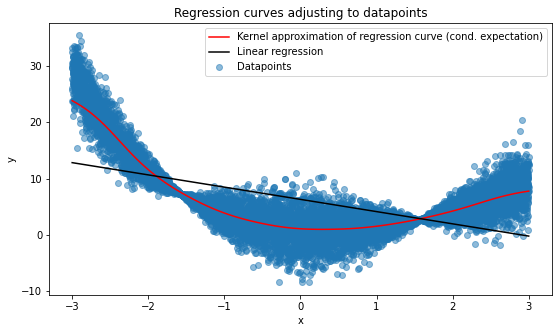

In [74]:
# Plotting
figure(figsize=(9,5))
t = linspace(min(X), max(X), 100) # plotting points
scatter(X, Y, alpha=0.5, label='Datapoints')
plot(t, E_y_given_x(t), color='red', label="Kernel approximation of regression curve (cond. expectation)")
plot(t, linear_regression(t), color='black', label="Linear regression")
legend()
title('Regression curves adjusting to datapoints')
xlabel('x')
ylabel('y')
show()

## III KNN

We consider 2D data generated using the code below. Each line of dataX and dataY represents points form a distinct class

    ns  = 200  # number of samples per class
    nc = 3    # number of classes
    dataX  = zeros(shape=(nc,ns))
    dataY  = zeros(shape=(nc,ns))
    dataX[0,:]  = randn(ns)
    dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
    dataX[1,:]  = -1 + .5*randn(ns)
    dataY[1,:]  =  1 + .5*randn(ns)
    dataX[2,:]  =  1 + .5*randn(ns)
    dataY[2,:]  = -1 + .5*randn(ns)

> 1. Visualize data and their class using a scatter plot.
> 2. Discretize the area $[-3,3]\times[-3,3]$ with 100 points per axis. For each point, compute the minimum surface $Z_{ij}=S(X_{ij},Y_{ij})$ of the disk that encloses the K nearest neighbors and represent a contour plot of $Z$
> 3. For each point of the surface, compute the posterior probabilities of the classes and plot the posterior probability map for each class. 
> 4. Plot the decision map for the class that supplies the decided class for each point based on posterior probability maximization.


Note: you could alternatively use scikit learn (https://scikit-learn.org/stable/modules/neighbors.html)

In [201]:
# We copy the above code

ns  = 200  # number of samples per class
nc = 3    # number of classes
dataX  = zeros(shape=(nc,ns))
dataY  = zeros(shape=(nc,ns))
dataX[0,:]  = randn(ns)
dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
dataX[1,:]  = -1 + .5*randn(ns)
dataY[1,:]  =  1 + .5*randn(ns)
dataX[2,:]  =  1 + .5*randn(ns)
dataY[2,:]  = -1 + .5*randn(ns)

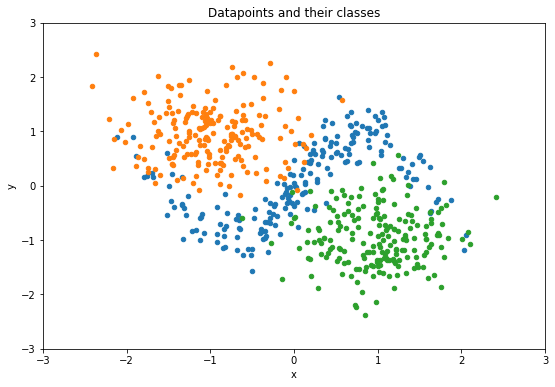

In [202]:
#Plotting

figure(figsize=(9,6))
scatter(dataX[0,:], dataY[0,:], s=20)
scatter(dataX[1,:], dataY[1,:], s=20)
scatter(dataX[2,:], dataY[2,:], s=20)
axis([-3,3,-3,3])
plt.title('Datapoints and their classes')
xlabel('x')
ylabel('y')
show()

In [203]:
number_of_points  = 100 # discretization
x = linspace(-3, 3, number_of_points)
y = linspace(-3, 3, number_of_points)
X,Y = meshgrid(x,y)

dataX_r = reshape(dataX, (1, nc*ns))[0]
dataY_r = reshape(dataY, (1, nc*ns))[0]
Z = zeros(shape=(number_of_points, number_of_points))

K = 6 # arbitrary quantity of neighbors
for i in range(number_of_points):
    for j in range(number_of_points):
        squared_distances = (X[i,j] - dataX_r)**2 + (Y[i,j] - dataY_r)**2
        # surface of disk that reaches the Kth neighbor (i.e. R squared)
        Z[i,j] = pi*squared_distances[argsort(squared_distances)[K-1]] 

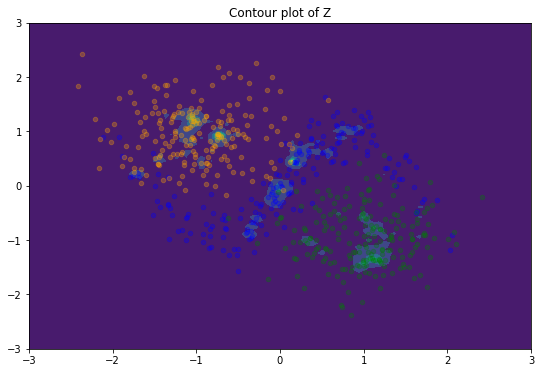

In [204]:
figure(figsize=(9,6))
axis([-3,3,-3,3])
contourf(X, Y, 1/Z)
scatter(dataX[0,:], dataY[0,:], color='blue', s=20, alpha=0.3)
scatter(dataX[1,:], dataY[1,:], color='orange', s=20, alpha=0.3)
scatter(dataX[2,:], dataY[2,:], color='green', s=20, alpha=0.3)
plt.title('Contour plot of Z')
show()

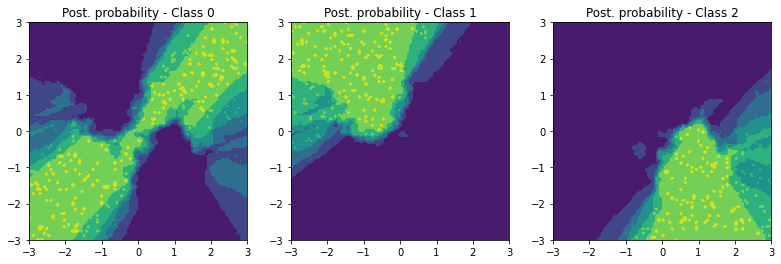

In [206]:
# The first ns samples correspond to class 0

figure(figsize=(18,4))

p_c = zeros(shape=(nc, number_of_points, number_of_points))
for i in range(number_of_points):
    for j in range(number_of_points):
        squared_distances = (X[i,j] - dataX_r)**2 + (Y[i,j] - dataY_r)**2
        R_squared = Z[i,j]/pi
        for c in range(nc):
            # if the numerator satisfies the condition, it is included in class c
            p_c[c,i,j] = sum(squared_distances[c*ns:(c+1)*ns] < R_squared)/K 
            
for c in range(nc):
    subplot(1, nc+1, c+1)
    plt.title('Post. probability - Class ' + str(c))
    contourf(X, Y, p_c[c,:,:])

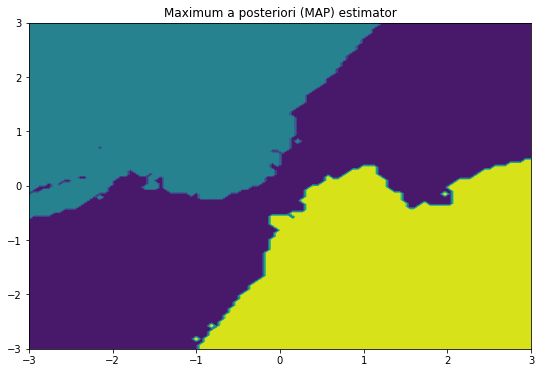

In [208]:
MAP = zeros(shape=(number_of_points, number_of_points))
for i in range(number_of_points):
    for j in range(number_of_points):
        MAP[i,j] = argsort(array([p_c[c,i,j] for c in range(nc)]))[-1] + 1

figure(figsize=(9,6))      
contourf(X, Y, MAP)
plt.title('Maximum a posteriori (MAP) estimator')
show()

## IV - Kernel methods with scikit-learn

We illustrate the use of scikit-learn for kernel density estimation by considering a simple example.

> 1. generate a set of data that contains $2.10^4$ samples with $\mathcal{N}(0,100)$ distribution, $10^4$ samples with $\mathcal{N}(3,1)$ distribution and $10^4$ samples with $\mathcal{N}(2,4)$ distribution.
> 2. Plot the kernel density estimator obtained using the **KernelDensity** function of scikit-learn.


Note: you could also use scikit learn for KNN (https://scikit-learn.org/stable/modules/neighbors.html)

In [241]:
from pylab import *
%matplotlib inline

from sklearn.neighbors import KernelDensity
import scipy.stats as st

In [274]:
n = array([2, 1, 1])*10**5 # number of samples per set of data (10 times more than asked)
mu = 0,3,7 # means
std_dev = 10,1,2 # std
data = concatenate([mu[0] + std_dev[0]*randn(n[0]), mu[1] + std_dev[1]*randn(n[1]), mu[2] + std_dev[2]*randn(n[2])])
data = reshape(data, (sum(n), 1)) # column needed

In [275]:
def pdf(x):
    p = array(n)/sum(n)
    return array([p[0]*st.norm.pdf(u, loc=mu[0], scale=std_dev[0]) 
                 +p[1]*st.norm.pdf(u, loc=mu[1], scale=std_dev[1])
                 +p[2]*st.norm.pdf(u, loc=mu[2], scale=std_dev[2]) for u in x]) # p[i] indicate weights

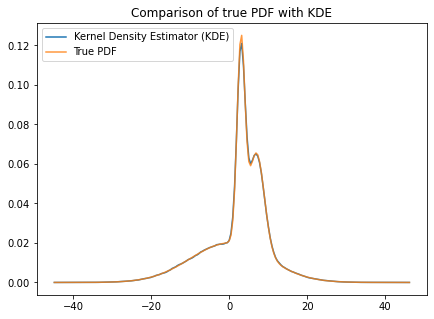

In [277]:
h = 1.06*std(data)/len(data)**(1/5)/2 # Silverman divided by 2, works better in this case
KDE = KernelDensity(kernel='gaussian', bandwidth=h).fit(data) # fitting

x = linspace(data.min()-1, data.max()+1, 200)[:,np.newaxis]
log_KDE = KDE.score_samples(x) # we evaluate in these linspace points

figure(figsize=(7,5))
plot(x, exp(log_KDE), label="Kernel Density Estimator (KDE)") 
plot(x, pdf(x), label="True PDF", alpha=0.8)
title('Comparison of true PDF with KDE')
legend()
show()